# DVC Results

###Converting the json file into a readable format

In [1]:
import pandas as pd
import json

# Load the JSON data from a file
with open("dvc_results.json", "r") as f:
    data = json.load(f)

# Extract the data into a list of dictionaries
rows = []
for key, value in data["results"].items():
    for item in value:
        row = {
            "query_id": item["query_id"],
            "timestamp_start": item["timestamp"][0],
            "timestamp_end": item["timestamp"][1],
            "raw_box_start": item["raw_box"][0],
            "raw_box_end": item["raw_box"][1],
            "proposal_score": item["proposal_score"],
            "sentence": item["sentence"],
            "sentence_score": item["sentence_score"],
            "vid_duration": item["vid_duration"],
            "pred_event_count": item["pred_event_count"]
        }
        rows.append(row)

# Create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(rows)

# Display the dataframe
print(df)


      query_id  timestamp_start  timestamp_end  raw_box_start  raw_box_end  \
0            2        22.342052      60.026634      22.342052    60.026634   
1            3         0.000000      14.703848       0.000000    14.703848   
2            1         0.000000      59.946327       0.000000    59.946327   
3            6        41.900105      60.026634      41.900105    60.026634   
4            8        53.385311      60.007046      53.385311    60.007046   
...        ...              ...            ...            ...          ...   
2595         8        53.376118      60.005131      53.376118    60.005131   
2596         5        11.984776      18.999842      11.984776    18.999842   
2597         4         0.000000       5.999777       0.000000     5.999777   
2598         7        35.009624      41.730267      35.009624    41.730267   
2599         1         0.153227      59.977589       0.153227    59.977589   

      proposal_score                                           

In [2]:
df.head()

,query_id,timestamp_start,timestamp_end,raw_box_start,raw_box_end,proposal_score,sentence,sentence_score,vid_duration,pred_event_count
0,2,22.342052,60.026634,22.342052,60.026634,0.385442,the camera pans around the room and leads into...,-21.947762,60.026634,3
1,3,0.000000,14.703848,0.000000,14.703848,0.381579,a man is throwing darts at a dart board.,-6.588737,60.026634,3
2,1,0.000000,59.946327,0.000000,59.946327,0.380050,a man is standing in a room.,-4.732702,60.026634,3
3,6,41.900105,60.026634,41.900105,60.026634,0.378716,the man continues to play the board and the ca...,-22.144897,60.026634,3
4,8,53.385311,60.007046,53.385311,60.007046,0.373742,the man walks away and the man walks away.,-11.594303,60.026634,3


#Word Cloud
Creating a word cloud of the most common words in the 'sentence' column.

In [3]:
import pandas as pd
import json

# Load data from JSON file
with open('dvc_results.json') as f:
    data = json.load(f)
    
# Extract relevant information from JSON data and create a DataFrame
rows = []
for item in data['results']:
    for result in data['results'][item]:
        row = {
            'timestamp': result['timestamp'],
            'raw_box': result['raw_box'],
            'proposal_score': result['proposal_score'],
            'sentence': result['sentence'],
            'sentence_score': result['sentence_score'],
            'query_id': result['query_id'],
            'vid_duration': result['vid_duration'],
            'pred_event_count': result['pred_event_count']
        }
        rows.append(row)
df_wordCloud = pd.DataFrame(rows)

# Extract the 'sentence' column from the DataFrame
sentences = df_wordCloud['sentence']


In [4]:
df_wordCloud.head()

,timestamp,raw_box,proposal_score,sentence,sentence_score,query_id,vid_duration,pred_event_count
0,"[22.342052459716797, 60.026634216308594]","[22.342052459716797, 60.026634216308594]",0.385442,the camera pans around the room and leads into...,-21.947762,2,60.026634,3
1,"[0.0, 14.703847885131836]","[0.0, 14.703847885131836]",0.381579,a man is throwing darts at a dart board.,-6.588737,3,60.026634,3
2,"[0.0, 59.946327209472656]","[0.0, 59.946327209472656]",0.380050,a man is standing in a room.,-4.732702,1,60.026634,3
3,"[41.90010452270508, 60.026634216308594]","[41.90010452270508, 60.026634216308594]",0.378716,the man continues to play the board and the ca...,-22.144897,6,60.026634,3
4,"[53.385311126708984, 60.00704574584961]","[53.385311126708984, 60.00704574584961]",0.373742,the man walks away and the man walks away.,-11.594303,8,60.026634,3


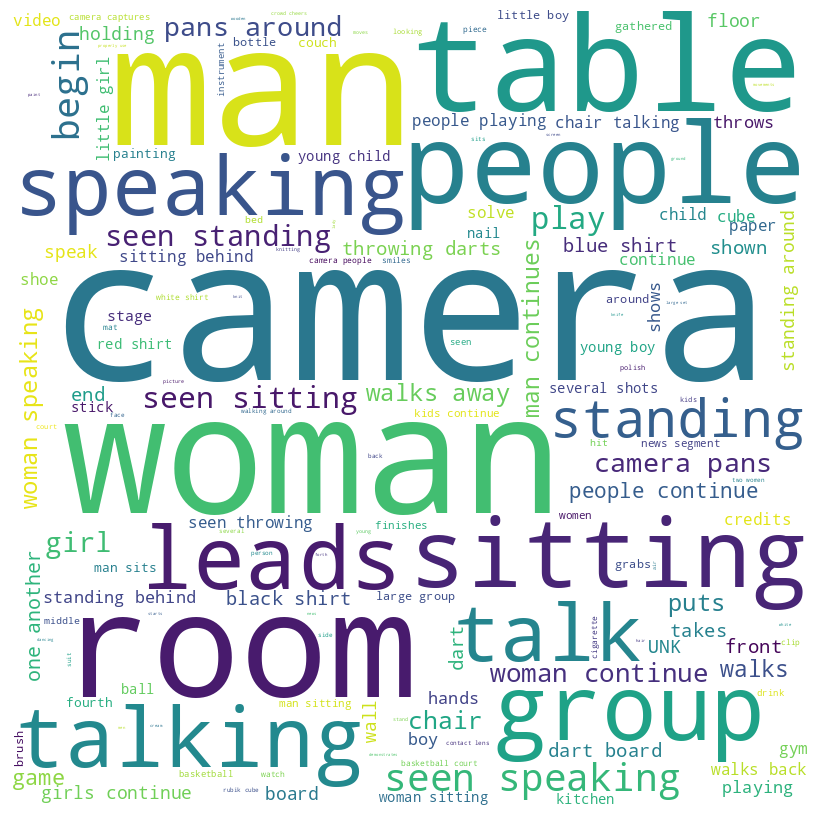

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the sentences to a single string
text = ' '.join(sentences)

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Save the word cloud as an image file
wordcloud.to_file("wordcloud.png")

# Show the plot
plt.show()
